In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1: Import Libraries**

In [12]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


**2: Load Dataset**

In [14]:
# Function to resize and normalize images
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # resize
    image = image / 255.0                                  # normalize [0,1]
    return image, label

# Apply preprocessing, shuffle, batch, and prefetch
ds_train = ds_train.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


**3: Visualize Some Training Images**

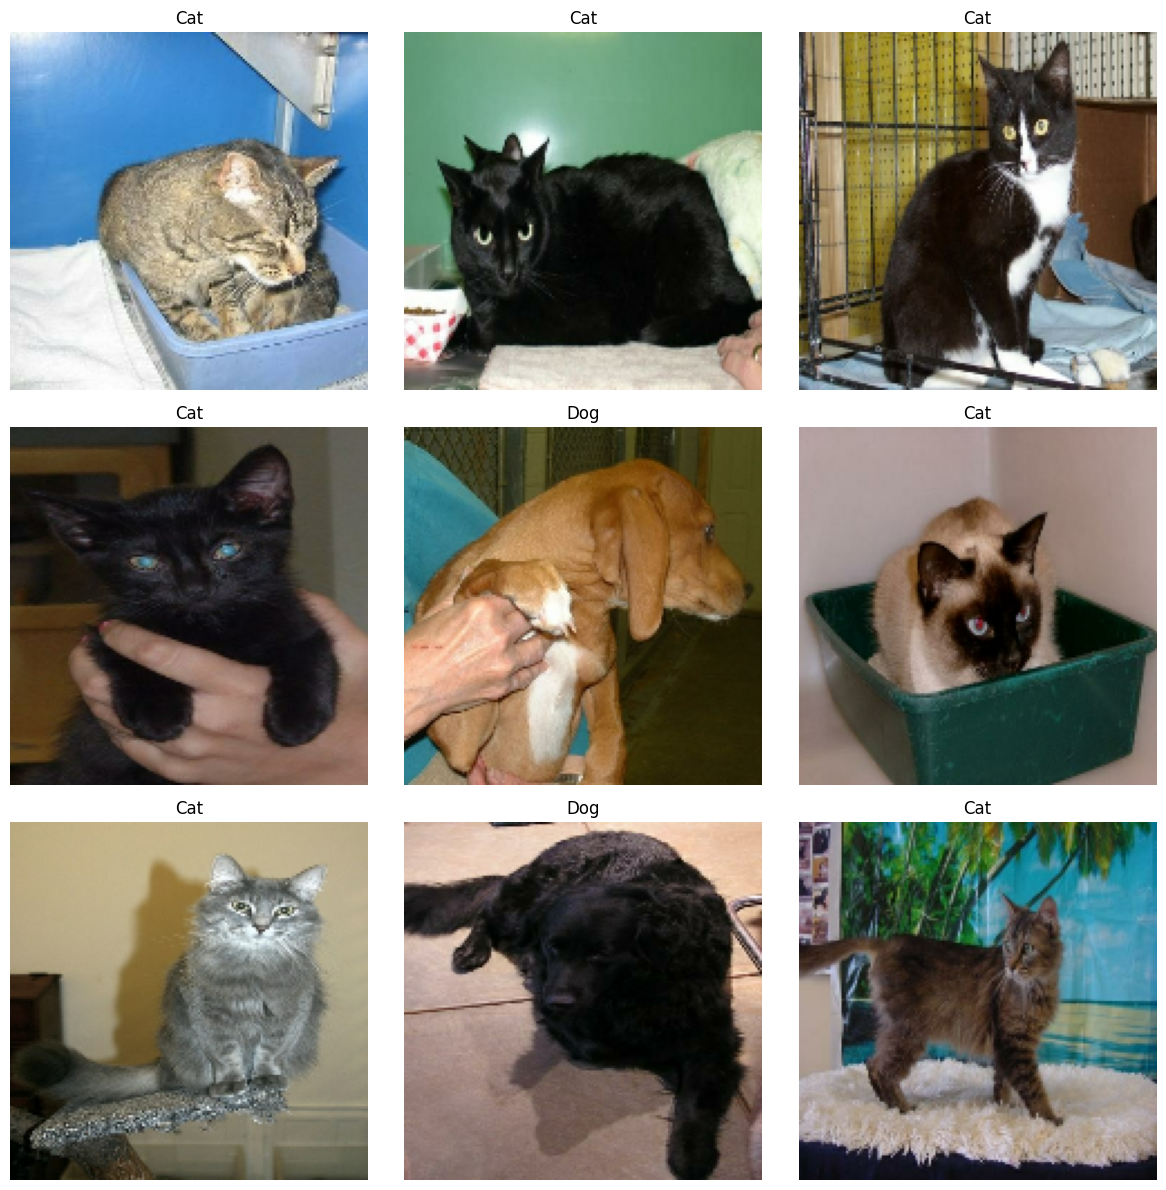

In [15]:
# Visualize first 9 images from training set
class_names = ['Cat', 'Dog']
plt.figure(figsize=(12,12))
for images, labels in ds_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis('off')
plt.tight_layout()
plt.show()


**4: Build Transfer Learning Model**

In [17]:
# Load MobileNetV2 pre-trained on ImageNet without the top layer
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # freeze base layers

# Add custom classification head correctly
x = base_model.output
x = GlobalAveragePooling2D()(x)   # apply GAP
x = Dense(128, activation='relu')(x)  # apply Dense to x
output = Dense(1, activation='sigmoid')(x)  # apply Dense to x

# Build the model using Functional API
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


**5: Train the Model**

In [18]:
# Train model on training data and validate on validation data
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 55s 76ms/step - accuracy: 0.9411 - loss: 0.1551 - val_accuracy: 0.9796 - val_loss: 0.0626
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.9811 - loss: 0.0551 - val_accuracy: 0.9770 - val_loss: 0.0612
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - accuracy: 0.9849 - loss: 0.0469 - val_accuracy: 0.9796 - val_loss: 0.0572
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 37s 61ms/step - accuracy: 0.9867 - loss: 0.0415 - val_accuracy: 0.9776 - val_loss: 0.0603
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.9885 - loss: 0.0348 - val_accuracy: 0.9791 - val_loss: 0.0631
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.9895 - loss: 0.0312 - val_accuracy: 0.9781 - val_loss: 0.0599
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.9928 - loss: 0.0256 - val_accuracy: 0.9809 - val_loss: 0.0586
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9939 - loss: 0.0230 - 

**7: Plot Accuracy & Loss**

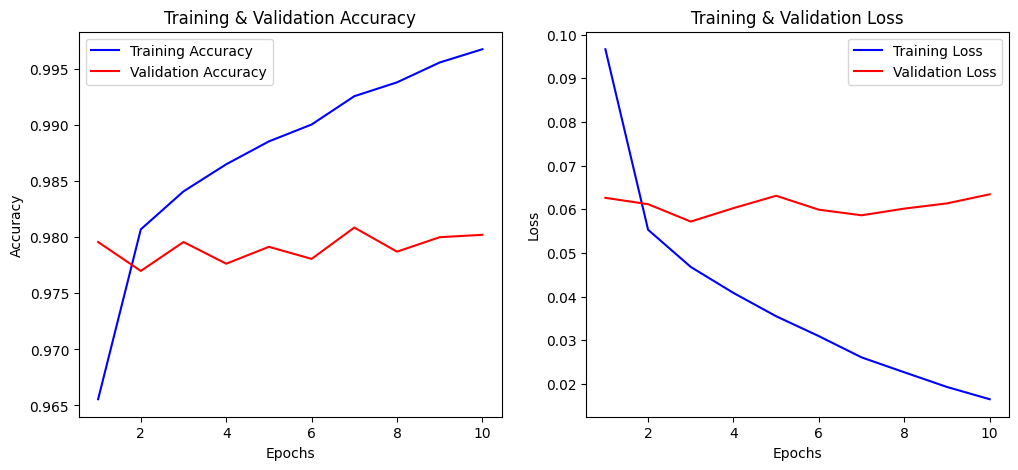

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**8: Plot Training & Validation Accuracy / Loss**

In [10]:
# Predict on validation set
y_true = []
y_pred = []

for images, labels in ds_val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


**9: Evaluate Model**

In [21]:
y_true = []
y_pred = []

for images, labels in ds_val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━

**10: Visualize Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/tmp/ipython-input-2890717993.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_names[int(preds[i] > 0.5)]


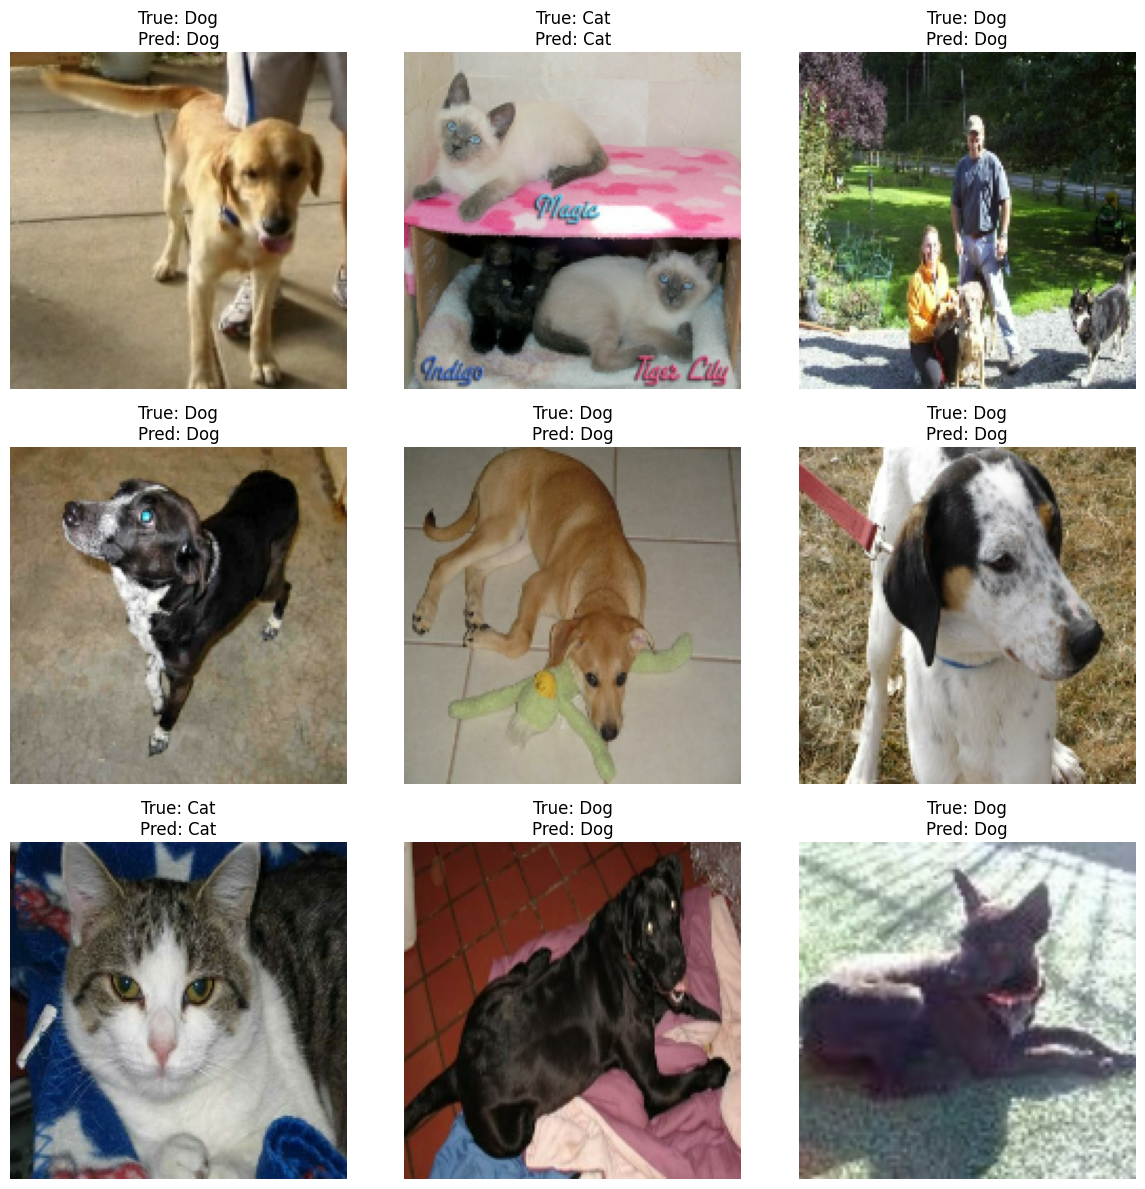

In [22]:
plt.figure(figsize=(12,12))
for images, labels in ds_val.take(1):
    preds = model.predict(images)
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy())
        true_label = class_names[labels[i]]
        pred_label = class_names[int(preds[i] > 0.5)]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
plt.tight_layout()
plt.show()


**11: Save Model**

In [23]:
model.save('/content/drive/MyDrive/cats_vs_dogs_mobilenetv2.h5')